In [1]:
import sys
from os import path

import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
np.random.seed(2019)
import tensorflow as tf
from sklearn import datasets

from S3VM import S3VM
from visualize import draw_embedded_data_and_boundary


In [2]:
n_features = 5
n_sep = 2
separability = np.random.randint(low=-n_sep, high=n_sep, size=n_features)
center_1, center_2 = np.random.randn(2, n_features)[:2]
center_2 += separability

X, y = datasets.make_blobs(n_samples=2000, n_features=n_features, centers=[center_1, center_2], 
                           cluster_std=[1, 1], random_state=3)
y[y == 0] = -1

n_unlabel = 1000

X_test = X[:n_unlabel]
y_test = y[:n_unlabel]

print(X)
print(y)

[[ 0.54024275  2.99322477  1.66179579  0.82937523  0.04227485]
 [-2.0661806  -0.40694943 -0.98070811  0.92639033 -1.63025271]
 [-1.91109978  1.41333773  1.01224855 -1.67926286 -2.11111867]
 ...
 [-0.03673112  4.90264818  0.87303712  0.14760496 -0.15020858]
 [-1.55678316  1.15264144 -0.61664133  0.42581478 -2.00792563]
 [-0.4533962   4.14162467  1.88197119  0.50749082 -0.22497693]]
[-1  1  1 ... -1  1 -1]


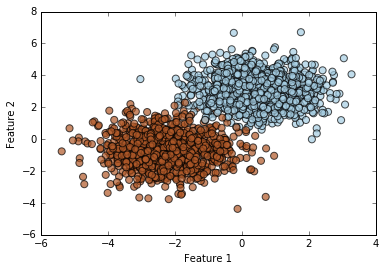

In [3]:
fig = plt.figure()

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=50, lw=1, alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

22
Instructions for updating:
Colocations handled automatically by placer.
Results(label-match ratio) for test set:  0.996


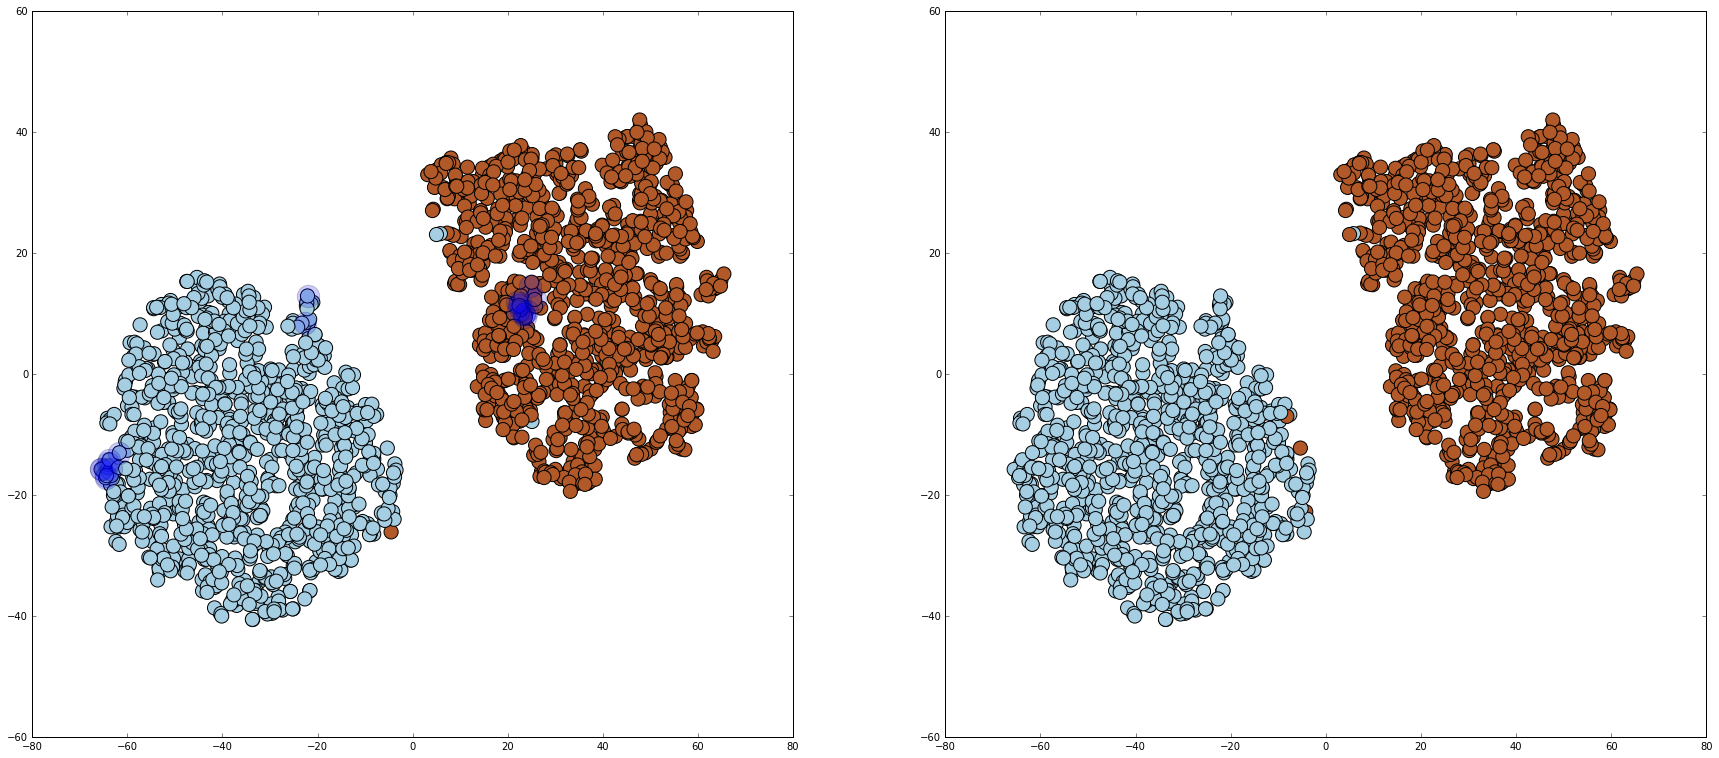

In [4]:
with tf.Session() as sess:
    svm = S3VM(X, sess, y, kernel='linear', kernel_dim=25, lr_init=0.01, 
               lr_decay=0.001, gamma=1.0, k_cluster=10, 
               k_unlabel=5, epoch=15000, batch=4, lamb=0.01, self_training=True, self_training_ths=10000, min_unlabel_data=500, verbose=False)
    svm.train()
    test = np.mean(svm.decision_function(X_test) == y_test)
    print('Results(label-match ratio) for test set: ', test)
    draw_embedded_data_and_boundary(X, svm, 2, y)
